In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

# set x
scale2 = ['scale2'] * 12
scale4 = ['scale4'] * 48
scale8 = ['scale8'] * 192
scale16 = ['scale16'] * 768
scale32 = ['scale32'] * 3072
scale = scale2 + scale4 + scale8 + scale16 + scale32

#set y
p = np.load(r'D:\cnnface\female_male_test_51_addnoise\Face_template\CI_analysis/p_sum.npy')
y_p = -np.log(p)

sns.swarmplot(x=scale,y=y_p)

bins = np.arange(0,5)
y_p_sign = -np.log(0.01/4092)
sns.lineplot(x=bins,y=y_p_sign)

Wall time: 1.47 s


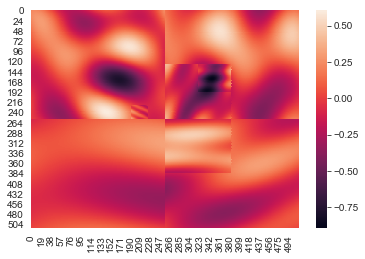

In [24]:
%%time 
# 选处概率大于40%的那几个参数，重建CI图像，没必要转化成Image，直接heatmap。

import numpy as np

import matplotlib.pyplot as plt
from cnnface.stimulus.noise_stimulus_generate import generateCI



p_signIndex = np.load(r'D:\cnnface/female_male_test_51_addnoise\Face_template\CI_analysis/p_signIndex.npy')
dist_param = np.load(r'D:\cnnface\female_male_test_51_addnoise\frame054/dist_params.npy')

highEffectPara = np.argwhere(dist_param >= 0.4)
highEffectParaIndex = p_signIndex[highEffectPara]

patches = np.load(r'D:\cnnface\female_male_test_51_addnoise\Face_template\meta_data/patches.npy')
patchIdx = np.load(r'D:\cnnface\female_male_test_51_addnoise\Face_template\meta_data/patchidx.npy').astype('int64')

params_ci = np.load('D:\cnnface/female_male_test_51_addnoise\Face_template\meta_data/paras_ci.npy')
param = np.zeros(4092)
for i in highEffectParaIndex:
    param[i] = params_ci[i]

ci = generateCI(patches,patchIdx,param)

sns.heatmap(ci)

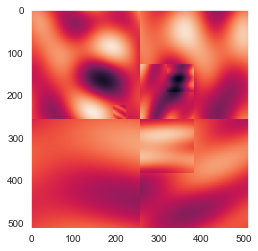

In [28]:
plt.imshow(ci)


In [41]:
from PIL import Image
from cnnface.stimulus.Image_processing import nor
ci_nor = nor(ci) *255
 
ci_img = Image.fromarray(ci_nor) 
ci_img.show()


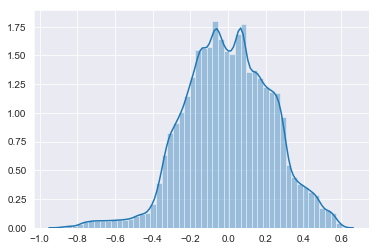

In [40]:
sns.set_style('darkgrid')
sns.distplot(ci.reshape(-1))

In [85]:
ci_mask40 = np.zeros(ci.shape)
ci_mask40[np.abs(ci)>0.45] = 1
ci_mask40 = ci_mask40.astype('bool')

In [86]:
baseface = Image.open(r'D:\cnnface\female_male_test_51_addnoise\frame054/frame054_gray_512.jpg')
baseface_arr = np.array(baseface)
baseface_40_arr = np.zeros(ci.shape)
baseface_40_arr[ci_mask40] = baseface_arr[ci_mask40]
baseface_40 = Image.fromarray(baseface_40_arr).convert('RGB')
baseface_40.save(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise/baseface_45.jpg')

TypeError: Invalid dimensions for image data

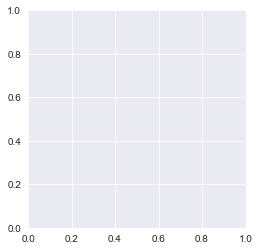

In [68]:
plt.imshow(baseface_40_arr)
